In [11]:
%load_ext autoreload
%autoreload 2
from Code import plot_utils
from Code import array_analysis as ar
from Code import antenna as ant
import scipy.io
from os.path import dirname, join as pjoin
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import random


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 0, 'Elevation')

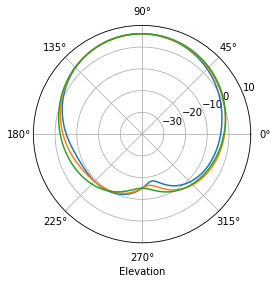

In [2]:

antenna_elm = ant.Antenna('Code', 'ant_gain_pat.mat')
thetas, cut = antenna_elm.get_theta_cut(0)
thetas2, cut2 = antenna_elm.get_theta_cut(45)
thetas3, cut3 = antenna_elm.get_theta_cut(90)
plt.polar(thetas, cut, thetas2, cut2, thetas3, cut3)
plt.ylim(-40, 10)
plt.xlabel('Elevation')


Peak angle: -0.689 (-39.50 deg.)
Peak max: 1.000
Steering angle: 0.689 (39.50 deg.)
Beam width: 0.471 (26.98 deg.)




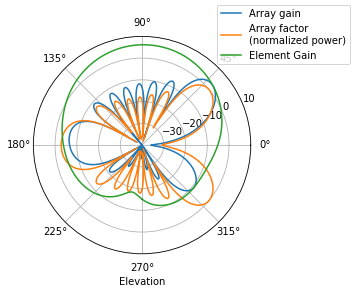

In [119]:
arr = ar.RectangularArray(Nx=8, Ny=8, f_0=8e9)
steer_theta = np.pi*1/4 + 0.2*random.random()
steer_phi = np.pi*1
cut_azimuth_deg = steer_phi*360/(2*np.pi)
cut_azimuth_rad = cut_azimuth_deg*2*np.pi/360

thetas, cut = antenna_elm.get_theta_cut(cut_azimuth_deg)
array_factor_cut = arr.array_factor(thetas + np.pi/2, cut_azimuth_rad, 
                                    steer_theta, steer_phi)#/(arr.Nx*arr.Ny)
array_gain_cut = cut + 20*np.log10(np.abs(array_factor_cut))
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(thetas, array_gain_cut, label='Array gain')
ax.plot(thetas, 20*np.log10(np.abs(array_factor_cut)), label='Array factor\n(normalized power)')
ax.plot(thetas, cut, label='Element Gain')
ax.set_ylim(-40,10)
ax.set_xlabel('Elevation')
fig.legend()

# print(ar.beam_stats(array_gain_cut, thetas))
ar.print_beam_stats(np.abs(array_factor_cut), thetas)

R_0 = 19.95262, z_0 = 1.08504
[[0.36042046 0.48910767 0.71035511 0.89492047 1.         1.
  0.89492047 0.71035511 0.48910767 0.36042046]]
1.08515224458507
19.952623149688797
[1, 2]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\windows\windows.py:1436: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


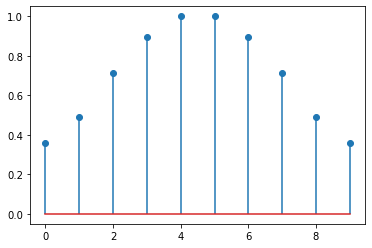

In [4]:
a = ar.dolph_tschebyscheff_1d_side_lobe_level(10,26)
z_0 = np.cosh(np.arccosh(20)/9)
#a = ar._dolph_tschebyscheff_a_even(1.0851, 10)
a = ar._dolph_tschebyscheff_a_even(z_0, 10)
A = np.matmul(a.T,a)
print(a)
plt.stem(a[0,:])

print(np.cosh(1/9*np.arccosh(20)))

print(10**(26/20))
print([i for i in range(1, 3)])
np.power(10, 26/20)
a = sig.chebwin(10, 26).T

R_0 = 1000.00000, z_0 = 1.37834
[[0.00196366 0.00837047 0.02026403 0.03445213 0.04431325 0.04431325
  0.03445213 0.02026403 0.00837047 0.00196366]
 [0.00837047 0.03568066 0.0863791  0.14685846 0.18889326 0.18889326
  0.14685846 0.0863791  0.03568066 0.00837047]
 [0.02026403 0.0863791  0.20911462 0.35552873 0.45729052 0.45729052
  0.35552873 0.20911462 0.0863791  0.02026403]
 [0.03445213 0.14685846 0.35552873 0.60445643 0.77746796 0.77746796
  0.60445643 0.35552873 0.14685846 0.03445213]
 [0.04431325 0.18889326 0.45729052 0.77746796 1.         1.
  0.77746796 0.45729052 0.18889326 0.04431325]
 [0.04431325 0.18889326 0.45729052 0.77746796 1.         1.
  0.77746796 0.45729052 0.18889326 0.04431325]
 [0.03445213 0.14685846 0.35552873 0.60445643 0.77746796 0.77746796
  0.60445643 0.35552873 0.14685846 0.03445213]
 [0.02026403 0.0863791  0.20911462 0.35552873 0.45729052 0.45729052
  0.35552873 0.20911462 0.0863791  0.02026403]
 [0.00837047 0.03568066 0.0863791  0.14685846 0.18889326 0.18889

AttributeError: 'tuple' object has no attribute 'set_ylim'

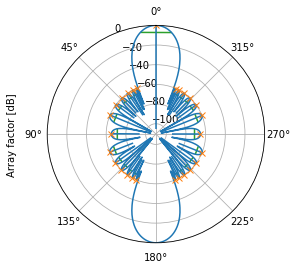

In [5]:
tscheb_array = ar.RectangularArray(Nx=10, Ny=10)
a = ar.dolph_tschebyscheff_1d_side_lobe_level(tscheb_array.Nx, 60)
#a = np.array([[0.357,0.485,0.706,0.890,1,1,0.890,0.706,0.485,0.357]])
A = np.matmul(a.T, a)
print(A)
tscheb_array.W = A
ax = tscheb_array.plot_array_factor_vertical()
ax.set_ylim(-30, 15)

tscheb_array.plot_array_factor_3D(scale='logarithmic', min_dB=-30)

x = np.arange(1,10+1)
y = np.arange(1,10+1)
X,Y = np.meshgrid(x,y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X,Y,A)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\windows\windows.py:1436: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "


0.3610788212628429

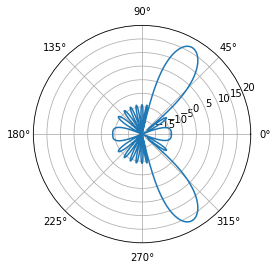

In [ ]:
lin_arr = ar.LinearArray(N=10) # , a=sig.chebwin(10,26)
lin_arr.a= [0.357,0.485,0.706,0.890,1,1,0.890,0.706,0.485,0.357]
lin_arr.a=sig.chebwin(10,26)
#lin_arr.a= [1,0.890,0.706,0.485,0.357, 0.357,0.485,0.706,0.890,1]
desired_angle = 60*2*np.pi/360
lin_arr.beta = -lin_arr.k*lin_arr.d*np.cos(desired_angle) # Phase shift
ax = lin_arr.plot_array_factor(projection="polar")
ax.set_ylim(-20, 20)
lin_arr.a[0]